In [2]:
# Instalando as bibliotecas e atualizando 
!pip install pyDOE
!pip install -U seaborn
# Import MEF 1D Algorithm
!pip install -i https://test.pypi.org/simple/ FINITO-FEM-TOOLBOX
from FINITO_FEM_TOOLBOX import MEF1D
from RASD_TOOLBOX import *
import numpy as np

Looking in indexes: https://test.pypi.org/simple/


In [9]:
PX = ['NORMAL', 500, 100]
PY = ['NORMAL', 1000, 100]

SETUP = {'REPETITIONS': 1,
        'TOTAL SAMPLING': 10000,
        'TOTAL G FUNCTIONS': 1,
        'TOTAL DESIGN VARIABLES': 2,
        'VARS': [PX, PY],
        'MODEL': 'MCS'}

In [10]:
def OBJ(X):
    P_X = X[0]
    P_Y = X[1]
    
    D_0 = 3
    L = 100
    E = 30 * 10 ** 6
    W = 2
    T = 4

    # STATE LIMIT FUNCTION
    
    R_0 = D_0
    S_0 = (4 * L ** 3 / (E * W * T)) * (((P_Y / T ** 2) ** 2  + (P_X / W ** 2) ** 2) ** 0.5)
    G_0 = R_0 - S_0

    R = [R_0] 
    S = [S_0] 
    G = [G_0]


    return R, S, G

In [11]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [12]:
RESULTS_TEST

{'TOTAL RESULTS':              X_0          X_1  R_0       S_0       G_0    I
 0     652.179667  1164.683395  3.0  2.975942  0.024058  0.0
 1     634.186899  1064.355031  3.0  2.865613  0.134387  0.0
 2     571.055263  1003.502174  3.0  2.598887  0.401113  0.0
 3     545.123811   975.341110  3.0  2.488221  0.511779  0.0
 4     580.132557  1136.790079  3.0  2.691686  0.308314  0.0
 ...          ...          ...  ...       ...       ...  ...
 9995  367.691013   981.288275  3.0  1.841740  1.158260  0.0
 9996  369.283463  1235.728850  3.0  2.006108  0.993892  0.0
 9997  440.870559  1267.446905  3.0  2.262190  0.737810  0.0
 9998  531.890777   822.786338  3.0  2.376165  0.623835  0.0
 9999  567.700415   870.120665  3.0  2.533125  0.466875  0.0
 
 [10000 rows x 6 columns],
 'NUMBER OF FAILURES': 413.0,
 'PROBABILITY OF FAILURE': 0.0413}

In [13]:
RESULTS_TEST['TOTAL RESULTS']

,X_0,X_1,R_0,S_0,G_0,I
0,652.179667,1164.683395,3.0,2.975942,0.024058,0.0
1,634.186899,1064.355031,3.0,2.865613,0.134387,0.0
2,571.055263,1003.502174,3.0,2.598887,0.401113,0.0
3,545.123811,975.341110,3.0,2.488221,0.511779,0.0
4,580.132557,1136.790079,3.0,2.691686,0.308314,0.0
...,...,...,...,...,...,...
9995,367.691013,981.288275,3.0,1.841740,1.158260,0.0
9996,369.283463,1235.728850,3.0,2.006108,0.993892,0.0
9997,440.870559,1267.446905,3.0,2.262190,0.737810,0.0
9998,531.890777,822.786338,3.0,2.376165,0.623835,0.0


C:\Users\Donizetti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


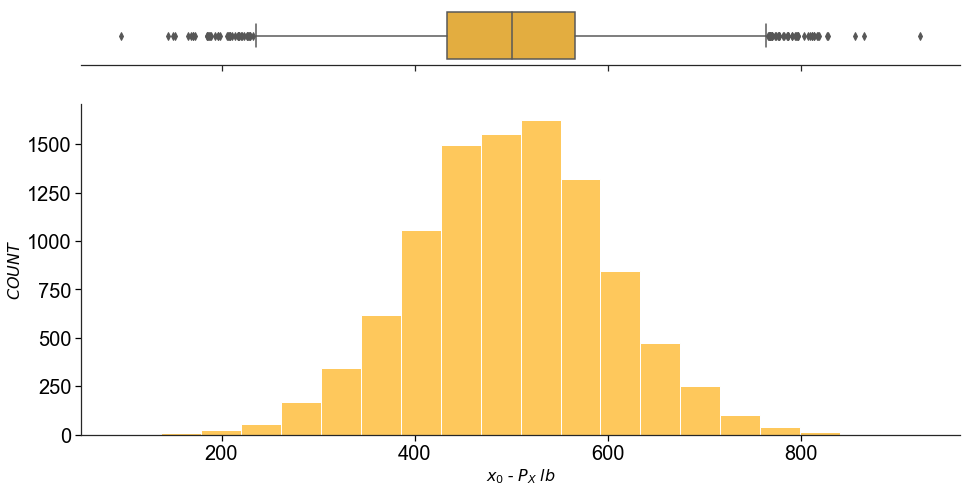

In [17]:
PLOT_SETUP = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS LABEL': '$x_0$ - $P_X$ $lb$',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
DATASET = RESULTS_TEST['TOTAL RESULTS']['X_0']      
# CALL PLOT
RASD_PLOT_1(DATASET, PLOT_SETUP)

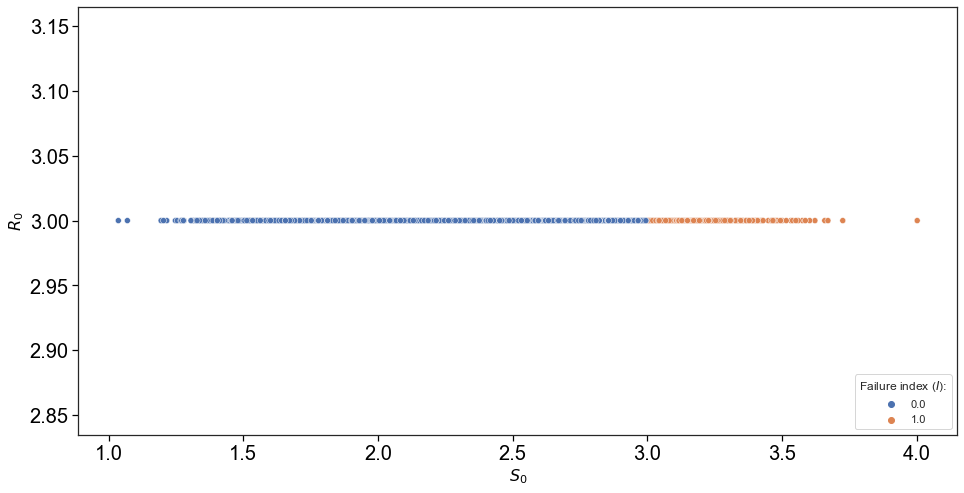

In [18]:
PLOT_SETUP = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.40, 
                'HEIGHT': 0.20,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
DATASET = RESULTS_TEST['TOTAL RESULTS']    
# CALL PLOT
RASD_PLOT_2(DATASET, PLOT_SETUP)

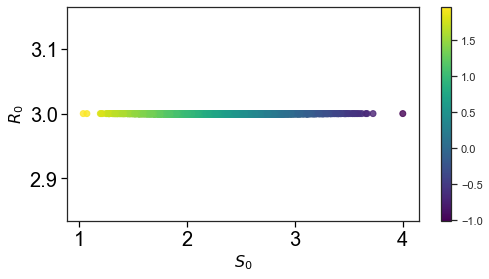

In [19]:
PLOT_SETUP = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'C VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}
# RESULTS
DATASET = RESULTS_TEST['TOTAL RESULTS'] 
# CALL PLOT
RASD_PLOT_3(DATASET, PLOT_SETUP)